# Models Tuning

This notebook was run in VScode to view GridSearchCV progress ([ref](https://www.kaggle.com/questions-and-answers/319408)).

Enable auto-reloading of external modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Import dependencies

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
%cd ..

/home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


In [4]:
import matplotlib
import matplotlib.pyplot as plt

from utils.custom_classes.data_loader import ACSEmploymentDataset
from utils.model_tuning_utils import *
from configs.config import *

plt.style.use('mpl20')
matplotlib.rcParams['figure.dpi'] = 100

In [5]:
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment

In [6]:
STATE = DATASET_CONFIG['state']
YEAR = DATASET_CONFIG['year']
DATASET_NAME = f"Folktables_{STATE}_{YEAR}"

## Loading ACSEmployment data

In [7]:
dataset = ACSEmploymentDataset(state=[STATE], year=YEAR, root_dir='data', with_nulls=False)

## Tune hyper-parameters and find the best baseline model

Baseline X_train shape:  (80684, 16)
Baseline X_test shape:  (20171, 16)
X_train_features.columns:  Index(['SCHL_2', 'SCHL_9', 'RAC1P_6', 'ESP_2', 'RELP_2', 'SCHL_19', 'ESP_7',
       'RELP_6', 'ESP_0', 'SCHL_13', 'MIG_2', 'DEYE_1', 'ANC_4', 'SCHL_14',
       'MIG_1', 'MAR_2', 'SCHL_5', 'SCHL_17', 'MIL_4', 'MIL_1', 'MAR_1',
       'SCHL_24', 'CIT_4', 'RELP_17', 'RELP_3', 'MIL_2', 'ESP_3', 'DEAR_2',
       'SEX_1', 'SCHL_10', 'RELP_8', 'ESP_5', 'SCHL_22', 'CIT_2', 'RAC1P_7',
       'DREM_2', 'RAC1P_9', 'SCHL_16', 'SCHL_21', 'SCHL_3', 'SCHL_15', 'ESP_1',
       'CIT_5', 'RAC1P_2', 'MIL_3', 'RELP_11', 'ANC_3', 'RELP_5', 'ESP_6',
       'RELP_0', 'SCHL_8', 'SCHL_20', 'ANC_2', 'DIS_1', 'DIS_2', 'RELP_9',
       'SCHL_23', 'AGEP', 'RELP_14', 'CIT_1', 'RELP_1', 'SCHL_18', 'RELP_16',
       'RELP_12', 'CIT_3', 'ESP_8', 'RAC1P_1', 'ANC_1', 'RELP_4', 'MIG_3',
       'MAR_5', 'SEX_2', 'DREM_0', 'MAR_4', 'MAR_3', 'SCHL_0', 'RELP_7',
       'SCHL_11', 'SCHL_4', 'SCHL_6', 'DEYE_2', 'SCHL_12', 'RELP_

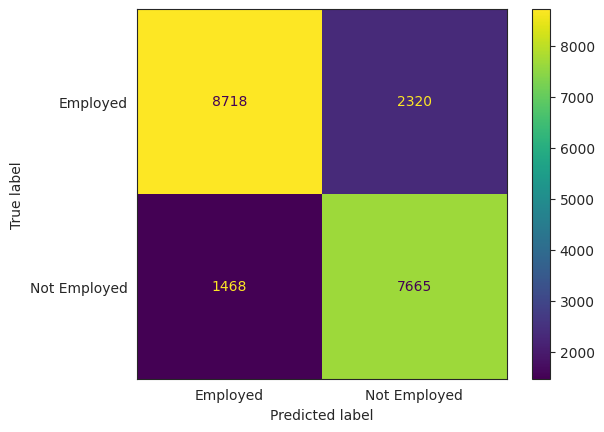

2022/12/15, 12:23:30: Tuning DecisionTreeClassifier...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 2/3; 1/16] START criterion=gini, max_depth=5, max_features=0.6..............
[CV 1/3; 1/16] START criterion=gini, max_depth=5, max_features=0.6..............
[CV 3/3; 1/16] START criterion=gini, max_depth=5, max_features=0.6..............
[CV 1/3; 2/16] START criterion=gini, max_depth=5, max_features=sqrt.............
[CV 2/3; 2/16] START criterion=gini, max_depth=5, max_features=sqrt.............
[CV 1/3; 3/16] START criterion=gini, max_depth=10, max_features=0.6.............
[CV 3/3; 2/16] START criterion=gini, max_depth=5, max_features=sqrt.............
[CV 3/3; 3/16] START criterion=gini, max_depth=10, max_features=0.6.............
[CV 2/3; 3/16] START criterion=gini, max_depth=10, max_features=0.6.............
[CV 3/3; 4/16] START criterion=gini, max_depth=10, max_features=sqrt............
[CV 1/3; 4/16] START criterion=gini, max_depth=10, max_features=sqrt......

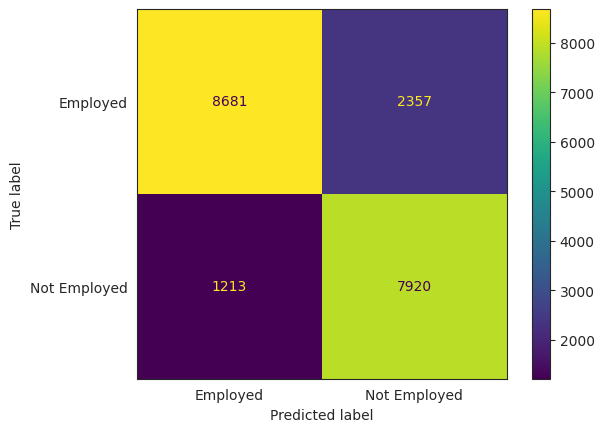

2022/12/15, 12:23:36: Tuning RandomForestClassifier...
Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 2/3; 1/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=10
[CV 1/3; 1/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=10
[CV 3/3; 1/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=10
[CV 1/3; 2/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=20
[CV 2/3; 2/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=20
[CV 3/3; 2/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=20
[CV 1/3; 3/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=50
[CV 2/3; 3/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=50
[CV 3/3; 3/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=50
[CV 2/3; 4/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estima

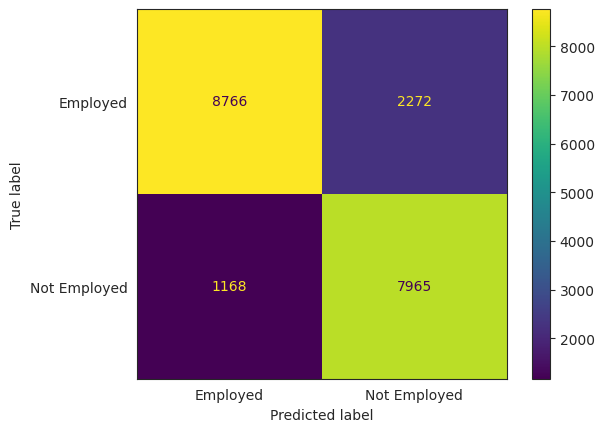

2022/12/15, 12:30:01: Tuning XGBClassifier...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3; 1/9] START learning_rate=0.1, max_depth=5, n_estimators=100, objective=binary:logistic
[CV 1/3; 1/9] START learning_rate=0.1, max_depth=5, n_estimators=100, objective=binary:logistic
[CV 3/3; 1/9] START learning_rate=0.1, max_depth=5, n_estimators=100, objective=binary:logistic
[CV 1/3; 2/9] START learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic
[CV 2/3; 2/9] START learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic
[CV 3/3; 2/9] START learning_rate=0.1, max_depth=5, n_estimators=200, objective=binary:logistic
[CV 1/3; 3/9] START learning_rate=0.1, max_depth=5, n_estimators=300, objective=binary:logistic
[CV 2/3; 3/9] START learning_rate=0.1, max_depth=5, n_estimators=300, objective=binary:logistic
[CV 1/3; 4/9] START learning_rate=0.1, max_depth=10, n_estimators=100, objective=binary:logistic
[CV 3/3; 3/9] START learning_

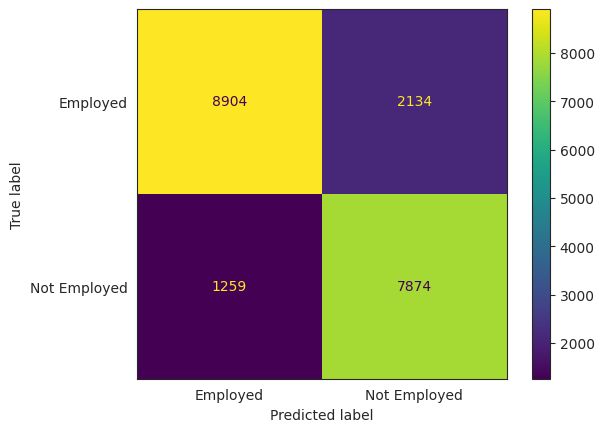

2022/12/15, 12:38:59: Tuning KNeighborsClassifier...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 2/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 3/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 1/3; 2/36] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 2/3; 2/36] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 3/3; 2/36] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 1/3; 3/36] START metric=minkowski, n_neighbors=7, weights=uniform...........
[CV 2/3; 3/36] START metric=minkowski, n_neighbors=7, weights=uniform...........
[CV 3/3; 3/36] START metric=minkowski, n_neighbors=7, weights=uniform...........
[CV 1/3; 4/36] START metric=minkowski, n_neighbors=7, weights=distance..........
[CV 2/3; 4/36] START metric=minkowski, n_neighbors=7, weights=distance.....

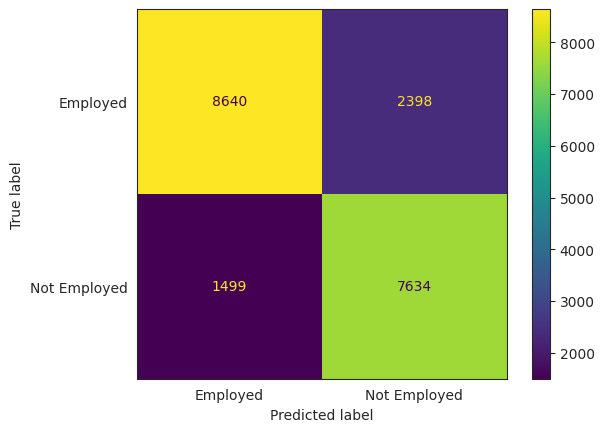

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params
0,Folktables_GA_2018,LogisticRegression,0.811692,0.812206,"{'max_iter': 50, 'penalty': 'l2', 'solver': 'l..."
1,Folktables_GA_2018,DecisionTreeClassifier,0.822761,0.823013,"{'criterion': 'entropy', 'max_depth': 10, 'max..."
2,Folktables_GA_2018,RandomForestClassifier,0.829189,0.829458,"{'max_depth': 10, 'max_features': 0.6, 'min_sa..."
3,Folktables_GA_2018,XGBClassifier,0.831348,0.831788,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
4,Folktables_GA_2018,KNeighborsClassifier,0.806320,0.806802,"{'metric': 'manhattan', 'n_neighbors': 15, 'we..."


In [8]:
ML_baseline_results_df, best_results_df = test_baseline_models(dataset, dataset_name=DATASET_NAME)
ML_baseline_results_df

In [9]:
best_results_df

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params,Model_Pred
0,Folktables_GA_2018,XGBClassifier,0.831348,0.831788,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...","[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, ..."


In [10]:
for index, row in ML_baseline_results_df.iterrows():
    print(f'\n\nModel name: {row["Model_Name"]}')
    pprint(row['Model_Best_Params'])



Model name: LogisticRegression
{'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}


Model name: DecisionTreeClassifier
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.6}


Model name: RandomForestClassifier
{'max_depth': 10,
 'max_features': 0.6,
 'min_samples_leaf': 1,
 'n_estimators': 100}


Model name: XGBClassifier
{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300,
 'objective': 'binary:logistic'}


Model name: KNeighborsClassifier
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [11]:
from datetime import datetime, timezone

now = datetime.now(timezone.utc)
date_time_str = now.strftime("%Y%m%d__%H%M%S")
ML_baseline_results_df.to_csv(os.path.join('results', 'models_tuning', f'tuning_results_{DATASET_NAME}_{date_time_str}.csv'),
                              sep=",", columns=ML_baseline_results_df.columns, float_format="%.4f")